### 시계열 -> (정상성있으면) AR, MA
### 시계열 -> (정상성없으면) ARIMA

In [1]:
 !conda install -c conda-forge statsmodels -y

Channels:
 - conda-forge
 - defaults
 - pytorch
 - anaconda
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [3]:
df = pd.read_csv("data/jj.csv")
df["year"] = pd.DatetimeIndex(df["date"]).year

In [4]:
advanced_decomposition = STL(df.data,period=4).fit() # 분기별로

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

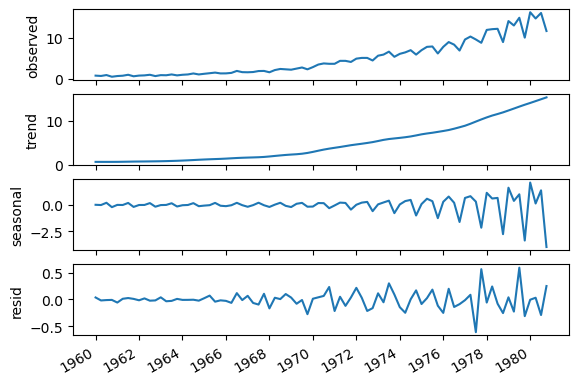

In [5]:
# 그림이 4장 나옴
# observed (관측된 원데이터 (손대지 않음))
# trend (경향)
# seasonal (분기별로 나눈 값의 주기성)
# resid (오차->제어안됨)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)
ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel("observed")
ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel("trend")
ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel("seasonal") # 1976쯤까지는 정상성 있지만 그뒤로는 없음
ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel("resid")

plt.xticks(
    np.arange(0,85,8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# 인지가능한 형태로
fig.autofmt_xdate()
plt.tight_layout

### AR

In [6]:
df.head()

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


In [7]:
df.tail()

,date,data,year
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980
83,1980-10-01,11.61,1980


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

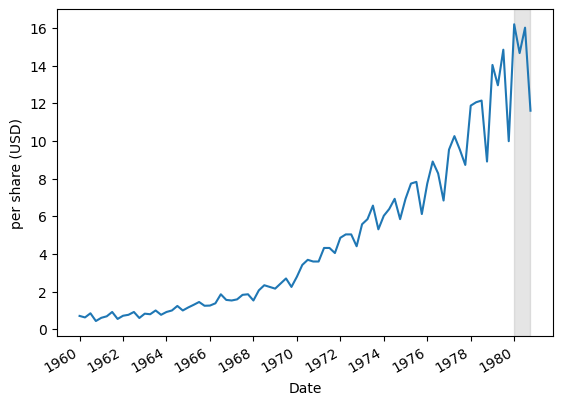

In [8]:
fig, ax = plt.subplots()
ax.plot(df["date"], df["data"])
ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83,color="#808080", alpha=0.2)
plt.xticks(
    np.arange(0,85,8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# 인지가능한 형태로
fig.autofmt_xdate()
plt.tight_layout

In [9]:
train = df[:-4]
test = df[-4:]

In [10]:
historical_mean = np.mean(train["data"]) # 전체데이터의 평균
historical_mean

4.308499987499999

In [11]:
test.loc[:,"pred_mean"] = historical_mean

C:\Users\user\AppData\Local\Temp\ipykernel_5412\632958467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,"pred_mean"] = historical_mean


In [12]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/(y_true))*100)
mape_historical_mean = mape(test["data"], test["pred_mean"])
mape_historical_mean # 70%로 틀림

70.00752579965119

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

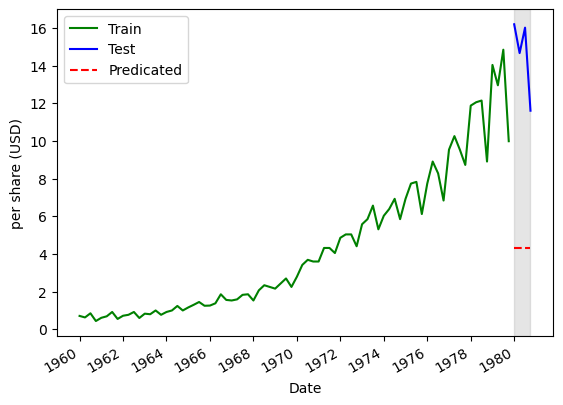

In [23]:
fig, ax = plt.subplots()
ax.plot(train["date"], train["data"],"g-", label="Train")
ax.plot(test["date"], test["data"],"b-", label="Test")
ax.plot(test["date"], test["pred_mean"], "r--", label="Predicated")

ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83,color="#808080", alpha=0.2)
ax.legend(loc=2)
plt.xticks(
    np.arange(0,85,8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# 인지가능한 형태로
fig.autofmt_xdate()
plt.tight_layout

### MA

In [14]:
last_year_mean = np.mean(train["data"][-4:])
test.loc[:, "pred_last_year_mean"] = last_year_mean
mape_last_year_mean = mape(test["data"], test["pred_last_year_mean"])
mape_last_year_mean

C:\Users\user\AppData\Local\Temp\ipykernel_5412\4169747460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last_year_mean"] = last_year_mean


15.596368072510302

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

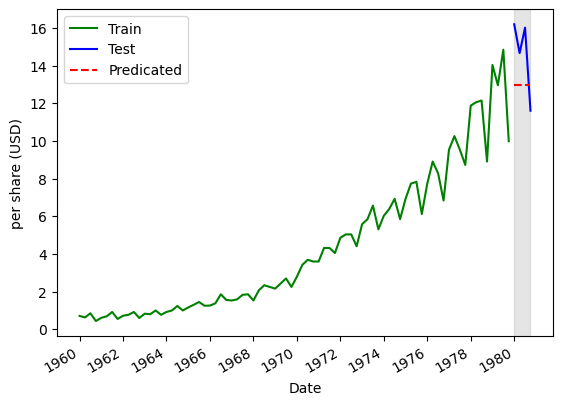

In [19]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g-", label="Train")
ax.plot(test["date"], test["data"], "b-", label="Test")
ax.plot(test["date"], test["pred_last_year_mean"], "r--", label="Predicated")

ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83, color="#808080", alpha=0.2)
ax.legend(loc=2)

plt.xticks(
    np.arange(0, 85, 8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]
)

fig.autofmt_xdate()
plt.tight_layout

In [20]:
test.loc[:,"pred_last_season"] = train["data"][-4:].values
mape_last_year_mean = mape(test["data"], test["pred_last_season"])
mape_last_year_mean

11.561658552433652

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

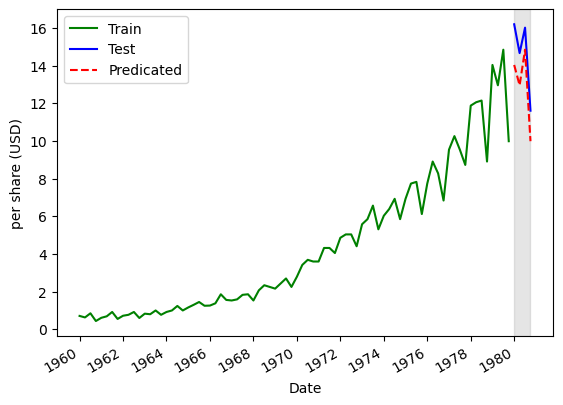

In [22]:
fig, ax = plt.subplots()
ax.plot(train["date"], train["data"],"g-", label="Train")
ax.plot(test["date"], test["data"],"b-", label="Test")
ax.plot(test["date"], test["pred_last_season"], "r--", label="Predicated")

ax.set_xlabel("Date")
ax.set_ylabel("per share (USD)")
ax.axvspan(80,83,color="#808080", alpha=0.2)
ax.legend(loc=2)
plt.xticks(
    np.arange(0,85,8),
    [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# 인지가능한 형태로
fig.autofmt_xdate()
plt.tight_layout